# EDA - dataset NSL-KDD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [2]:
train_df = pd.read_csv("../datasets/NSL-KDD/KDDTrain+.csv")

# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
train_df.rename(columns={'attack': 'attack_type'}, inplace=True)
train_df['attack'] = train_df['attack_type'].apply(lambda x: False if x == 'normal' else True)

# Drop constant columns (also this will be done in the pipeline)
train_df.drop(columns=[col for col in train_df.columns if train_df[col].nunique() == 1], inplace=True)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in train_df.columns
                   if pd.api.types.is_integer_dtype(train_df[col]) and train_df[col].min() == 0 and train_df[col].max() == 1]
train_df[columns_to_cast] = train_df[columns_to_cast].astype(bool)

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack
0,0,tcp,ftp_data,SF,491,0,False,0,0,0,0,False,0,False,0,0,0,0,0,False,False,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,False
1,0,udp,other,SF,146,0,False,0,0,0,0,False,0,False,0,0,0,0,0,False,False,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,False
2,0,tcp,private,S0,0,0,False,0,0,0,0,False,0,False,0,0,0,0,0,False,False,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,True
3,0,tcp,http,SF,232,8153,False,0,0,0,0,True,0,False,0,0,0,0,0,False,False,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,False
4,0,tcp,http,SF,199,420,False,0,0,0,0,True,0,False,0,0,0,0,0,False,False,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,False


In [3]:
train_df.shape

(125973, 43)

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
su_attempted,125973.0,0.001103,4.515438e-02,0.0,0.00,0.00,0.00,2.000000e+00
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03


## Data Cleaning Checks

### Missing Values

In [5]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

### Duplicate Rows

In [6]:
train_df[train_df.duplicated()].head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack


## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64



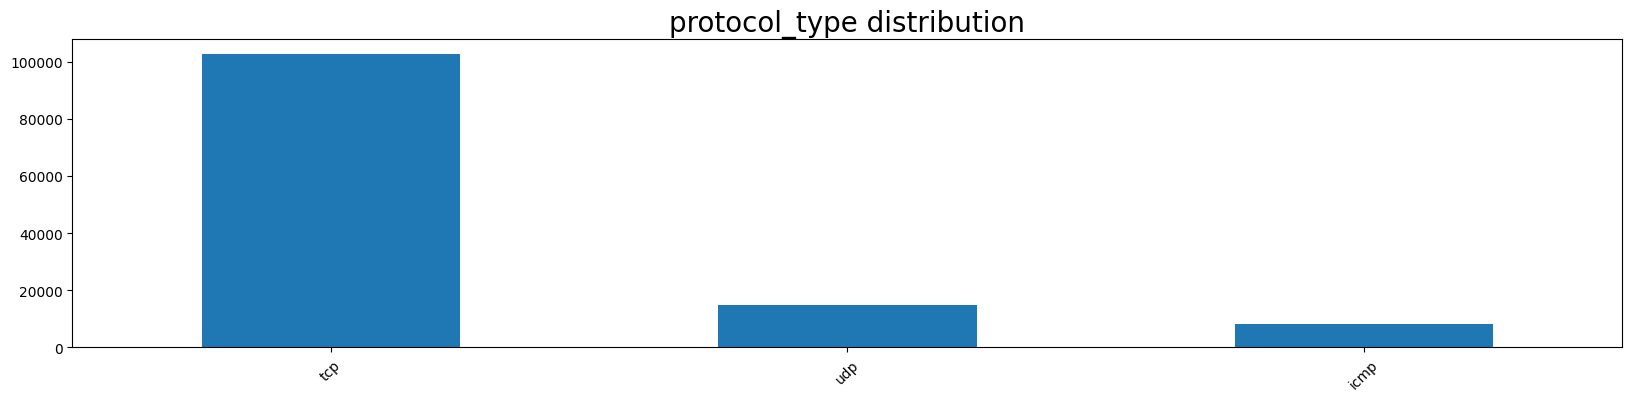

Column service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
couri

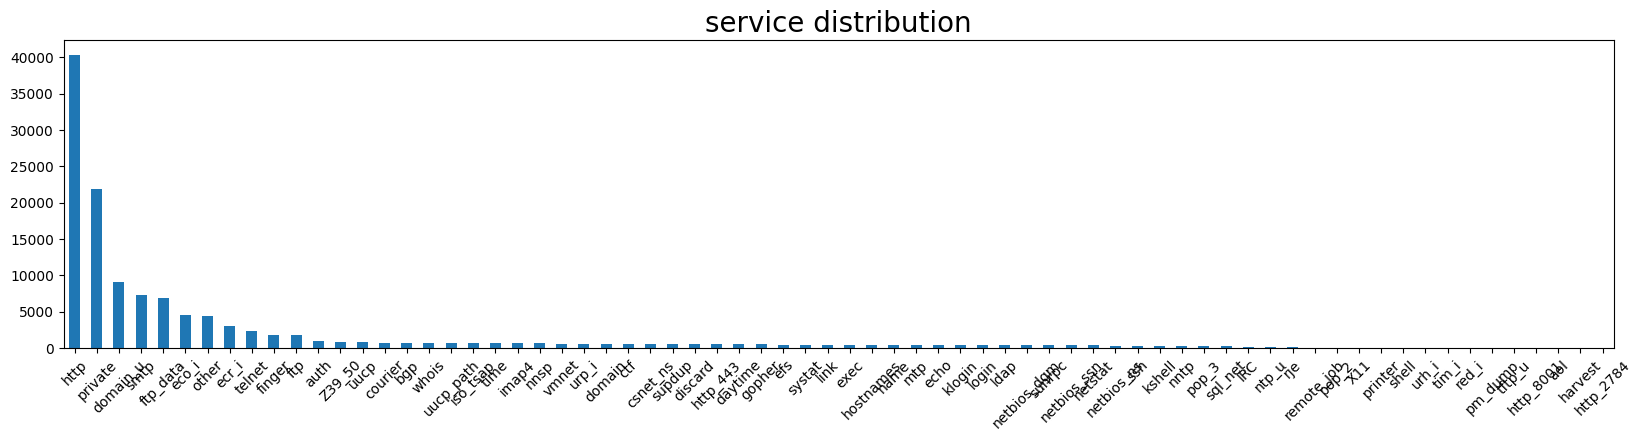

Column flag
------------------------------
Unique Values (11): ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

Value Counts:
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64



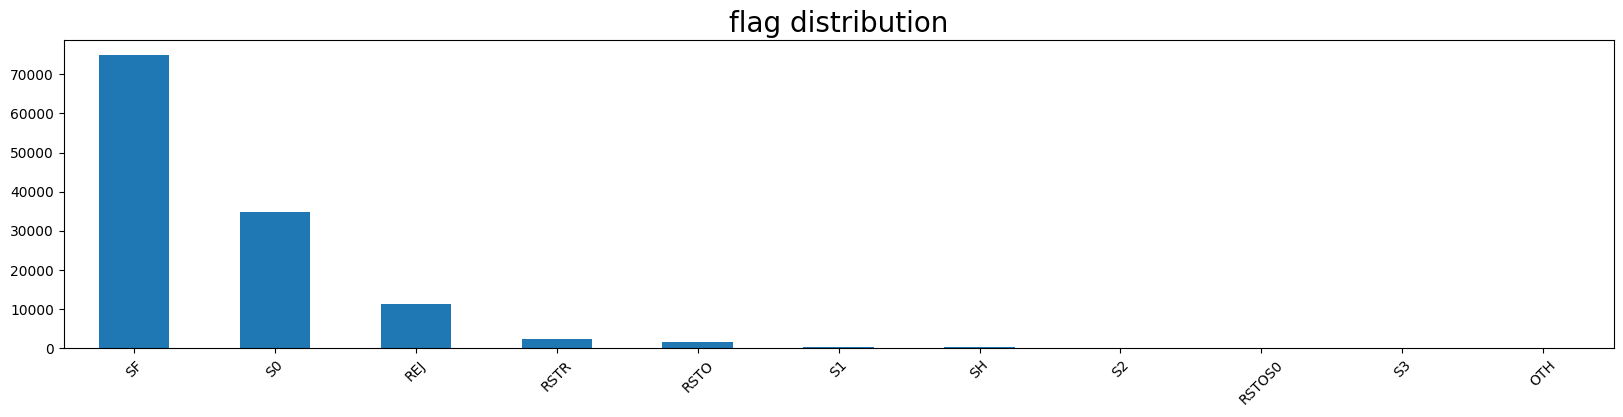

Column land
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    125948
True         25
Name: land, dtype: int64



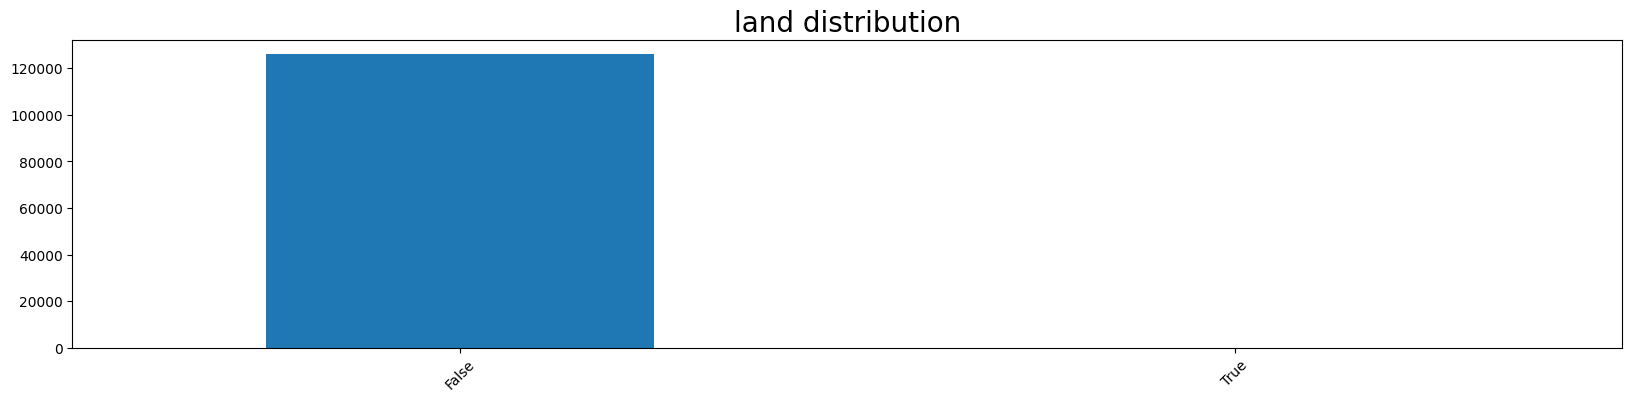

Column logged_in
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    76121
True     49852
Name: logged_in, dtype: int64



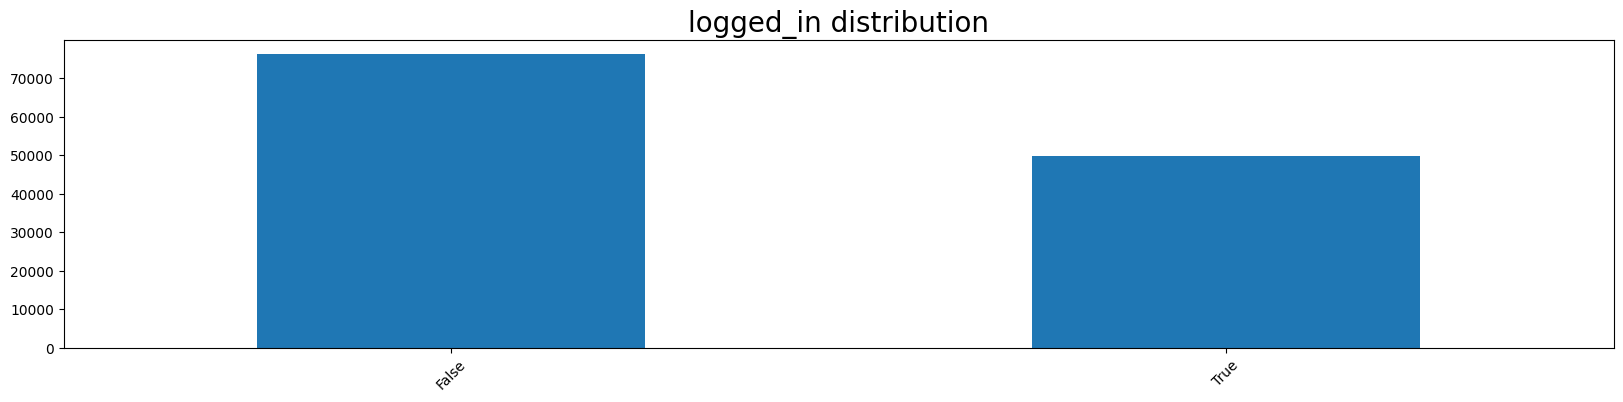

Column root_shell
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    125804
True        169
Name: root_shell, dtype: int64



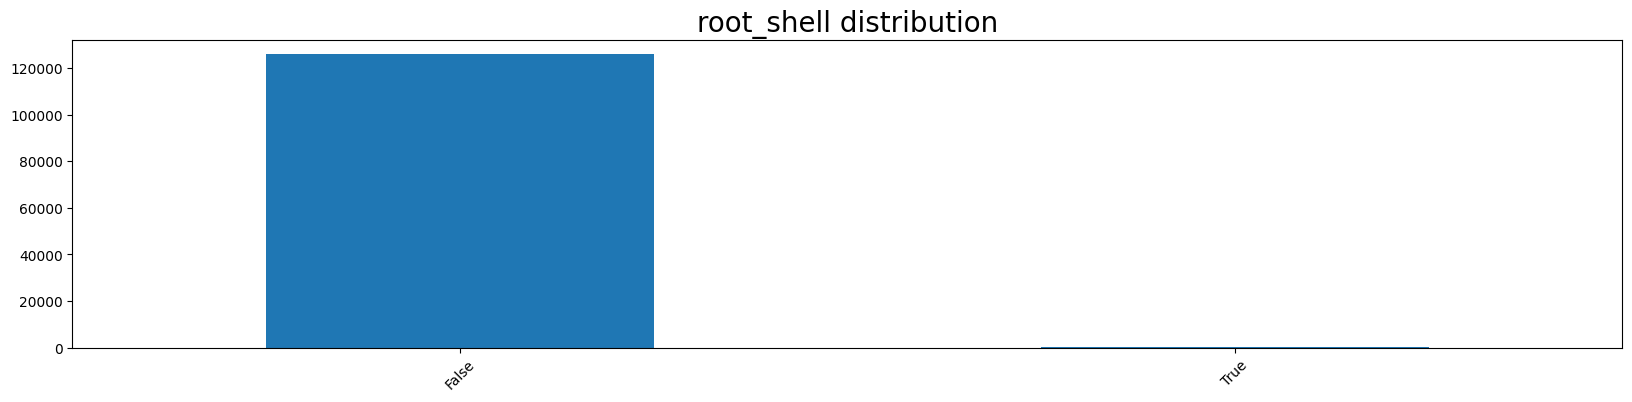

Column is_host_login
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    125972
True          1
Name: is_host_login, dtype: int64



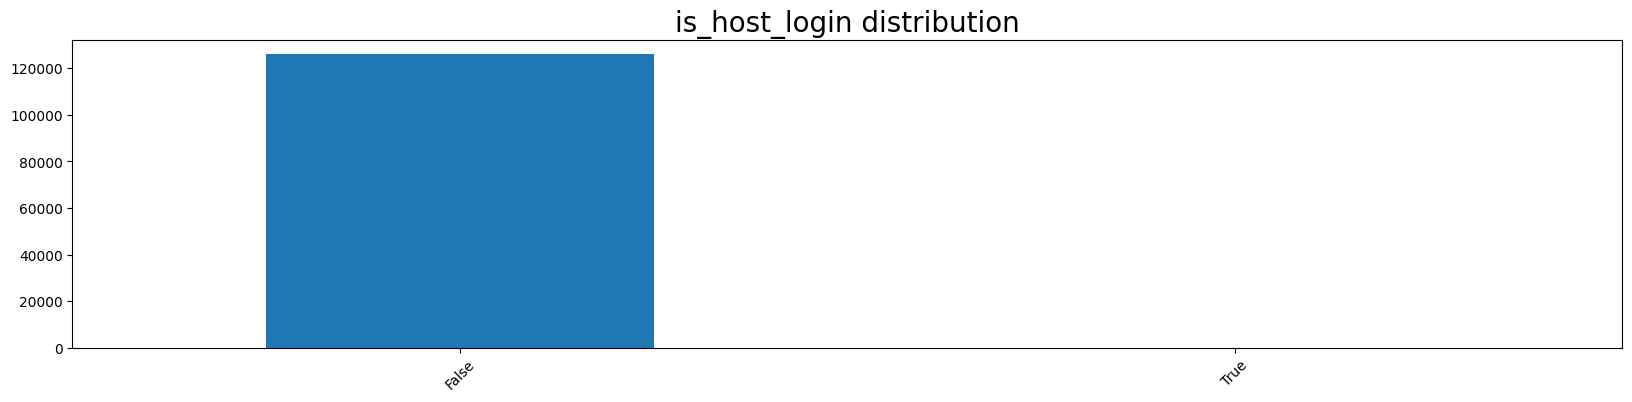

Column is_guest_login
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    124786
True       1187
Name: is_guest_login, dtype: int64



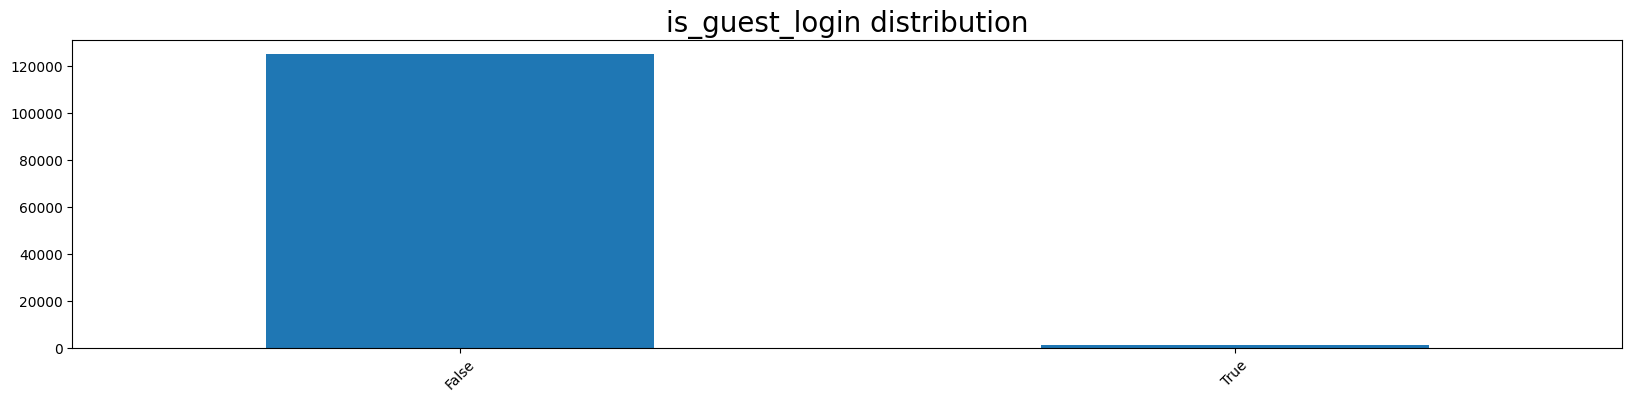

Column attack_type
------------------------------
Unique Values (23): ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']

Value Counts:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64



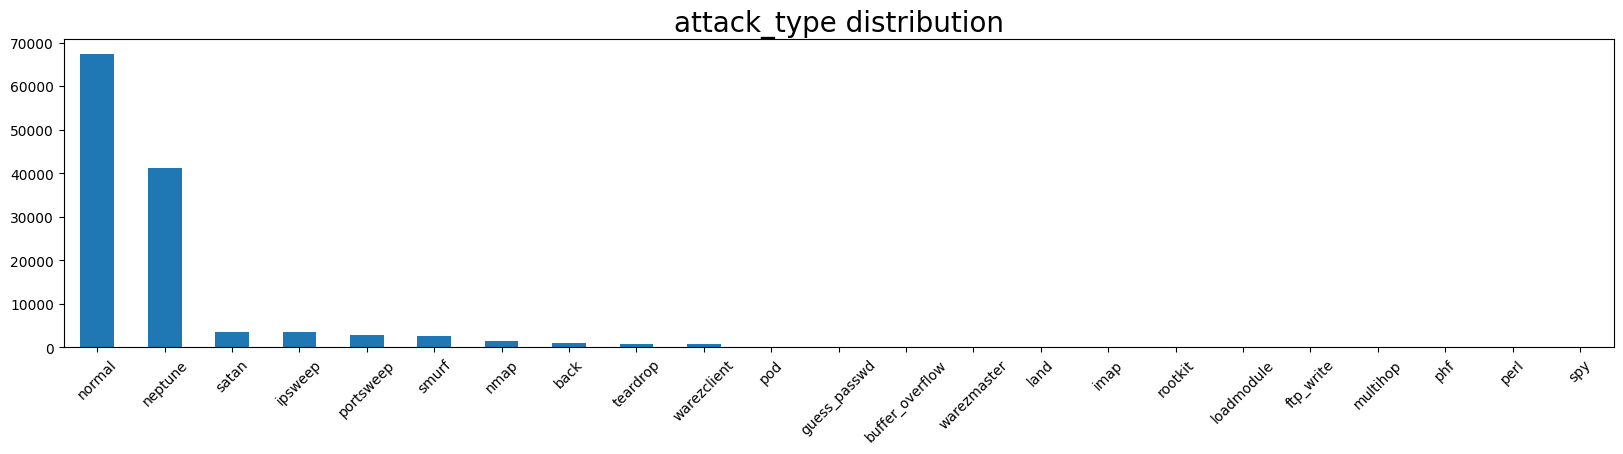

Column attack
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    67343
True     58630
Name: attack, dtype: int64



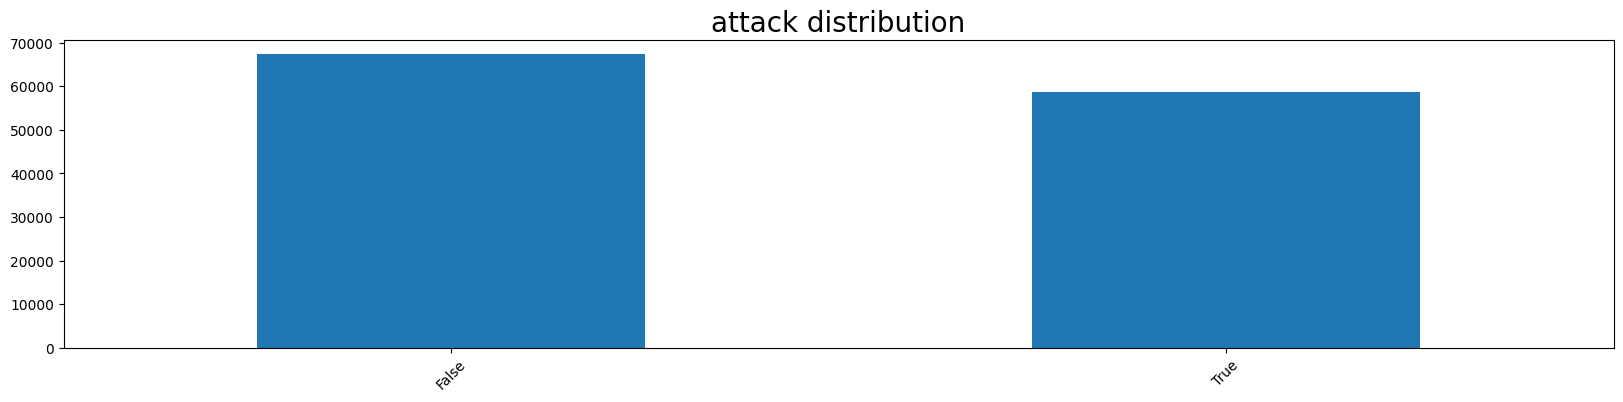

In [7]:
# Non-numerical columns
non_numerical_columns = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = train_df[column_name].unique()
    value_counts = train_df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

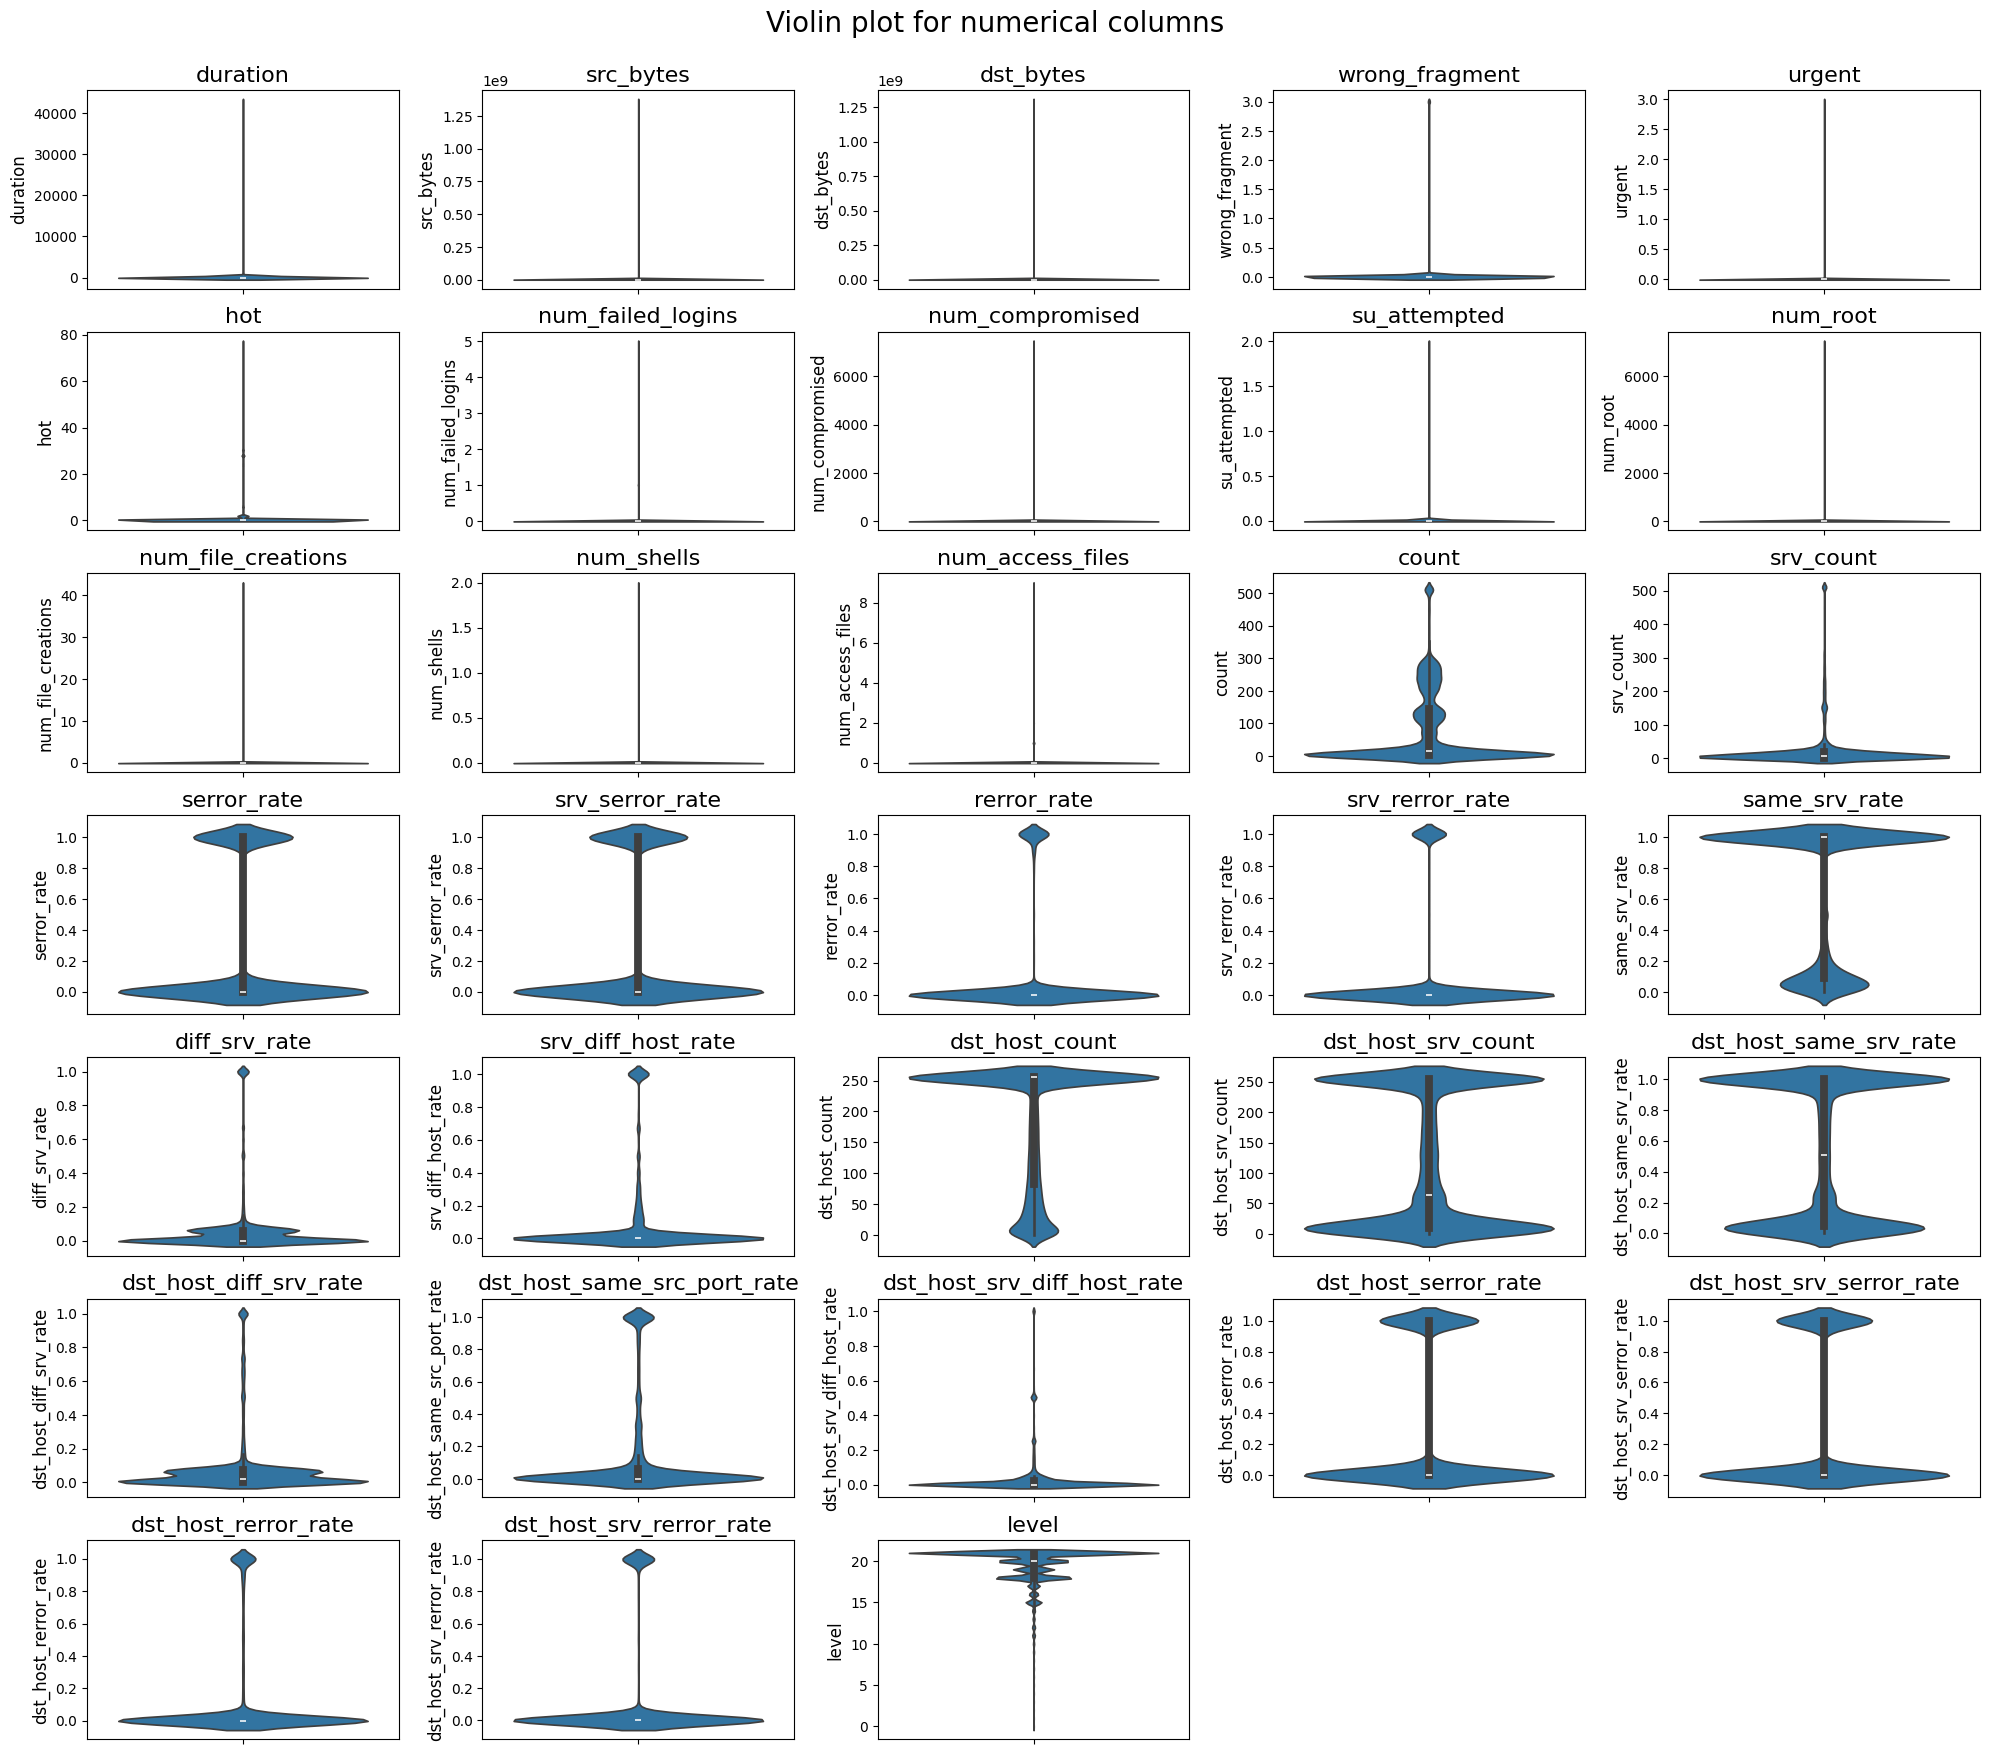

In [8]:
# Numerical columns
numerical_columns = train_df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=train_df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

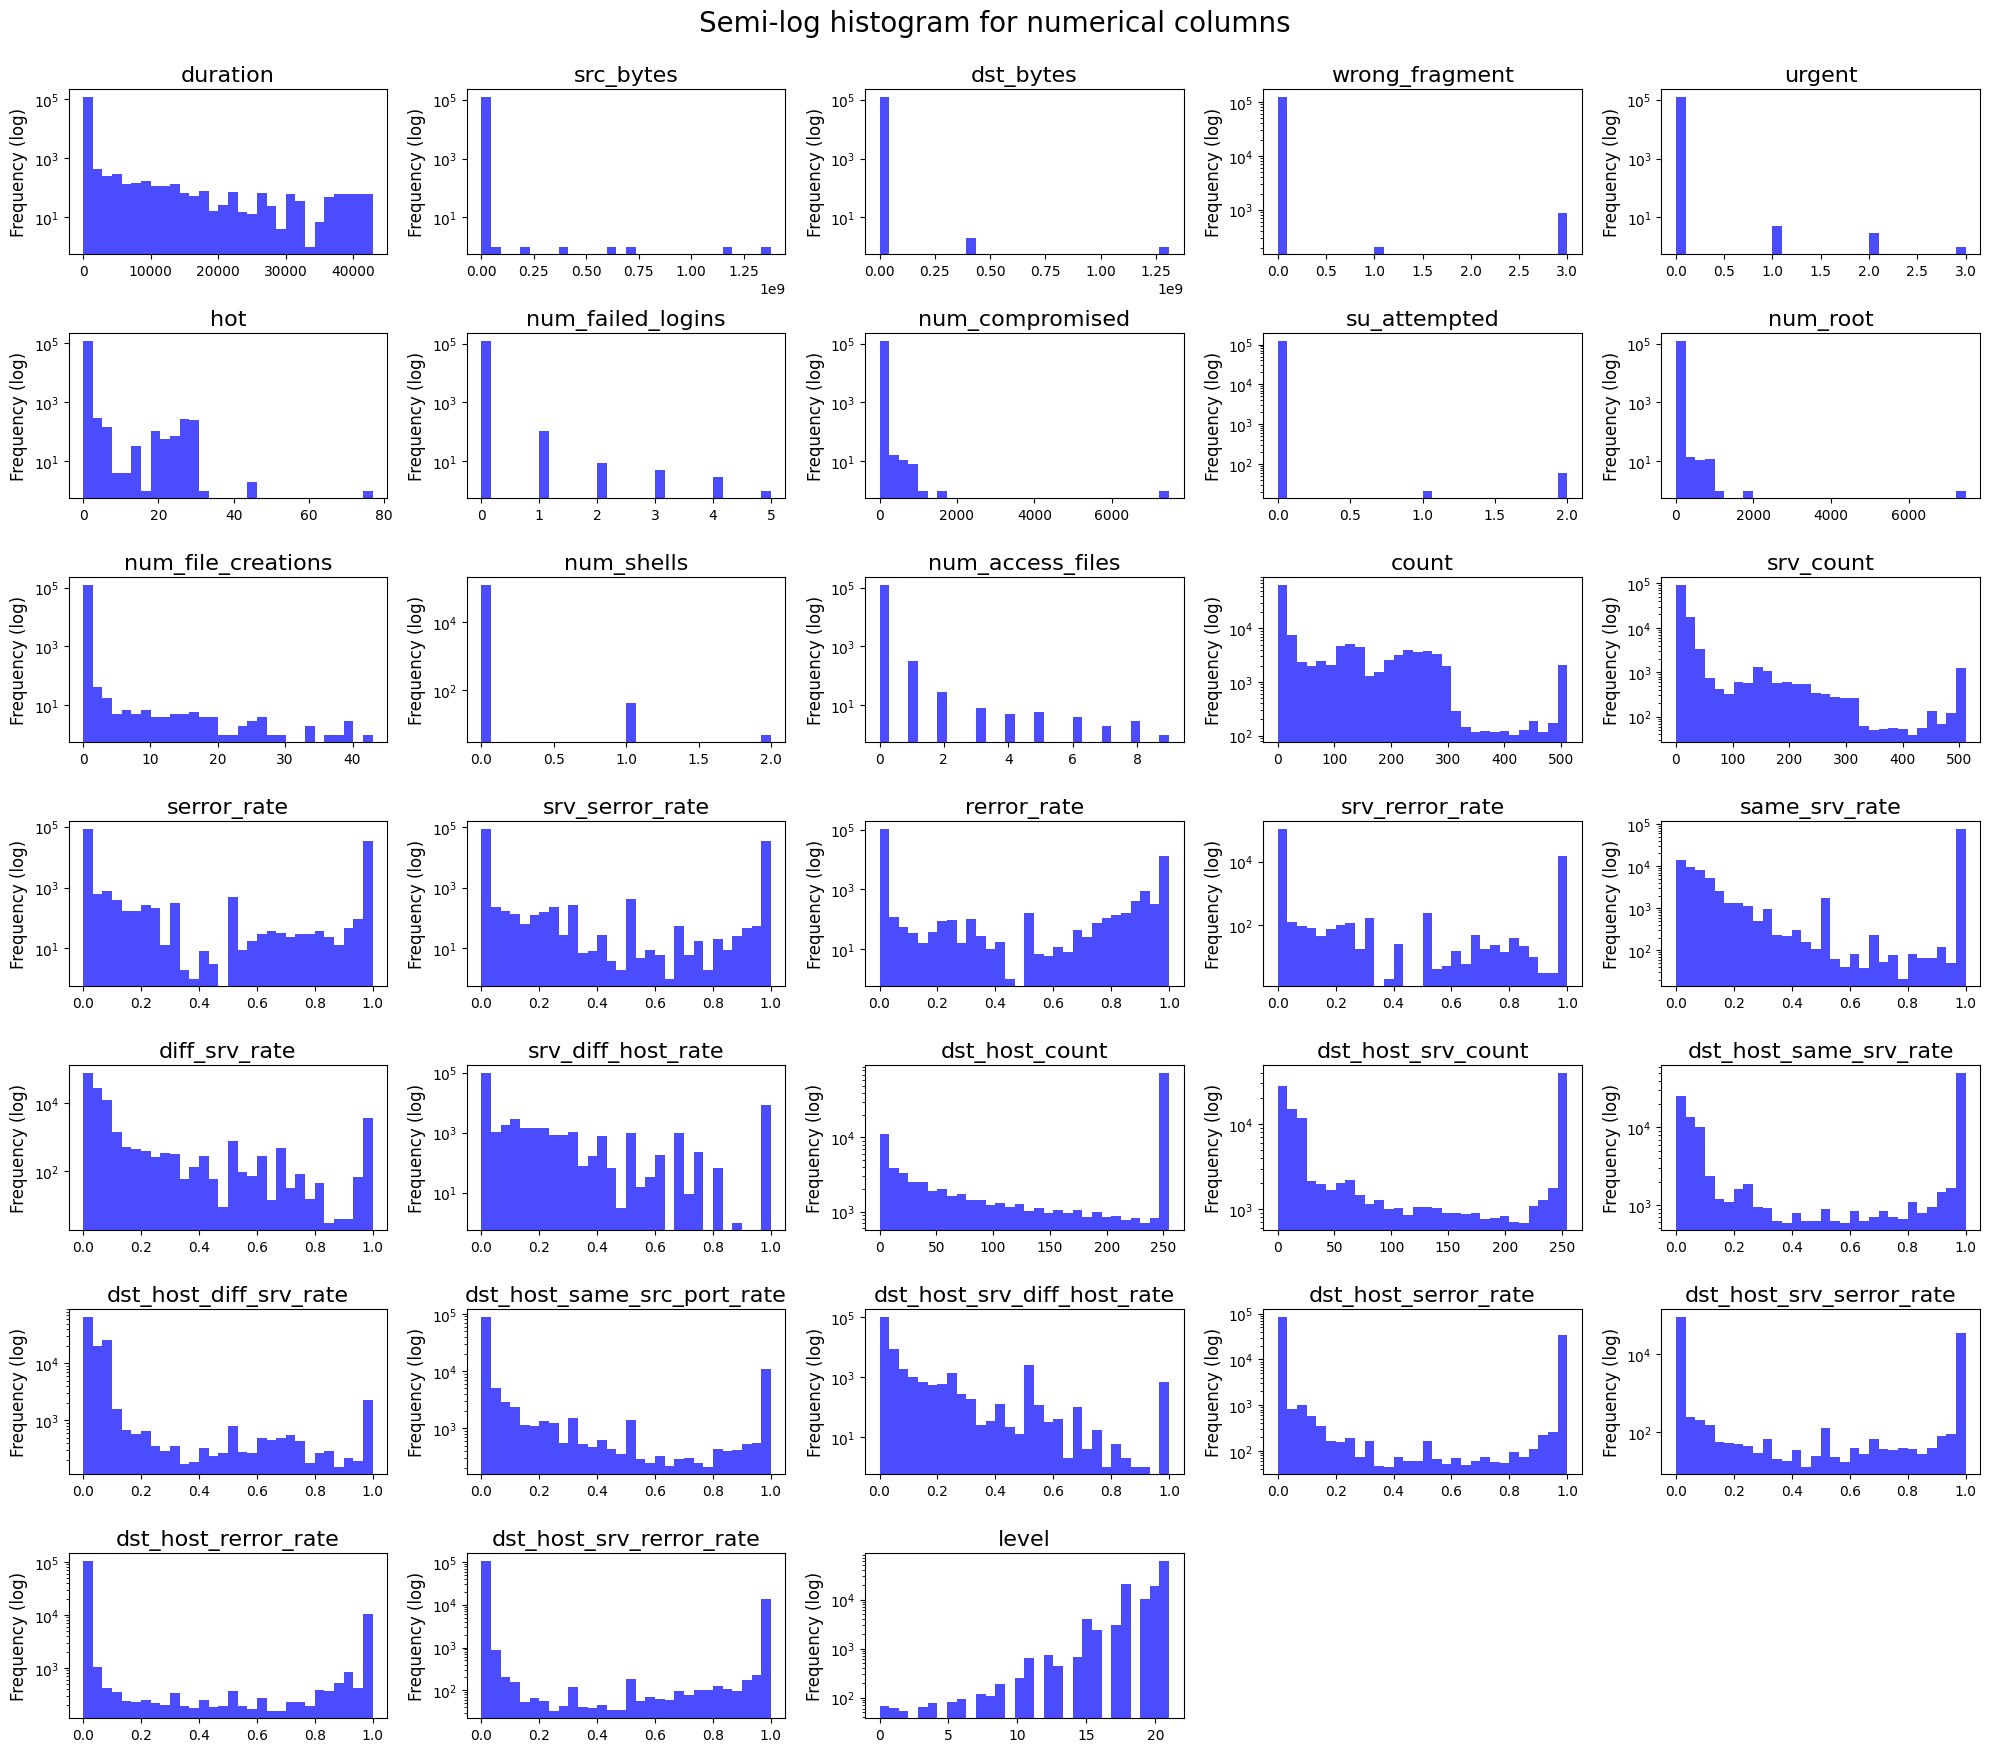

In [9]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(train_df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [10]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=train_df, x=col_name, hue=col_name, legend=False)
    total = len(train_df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

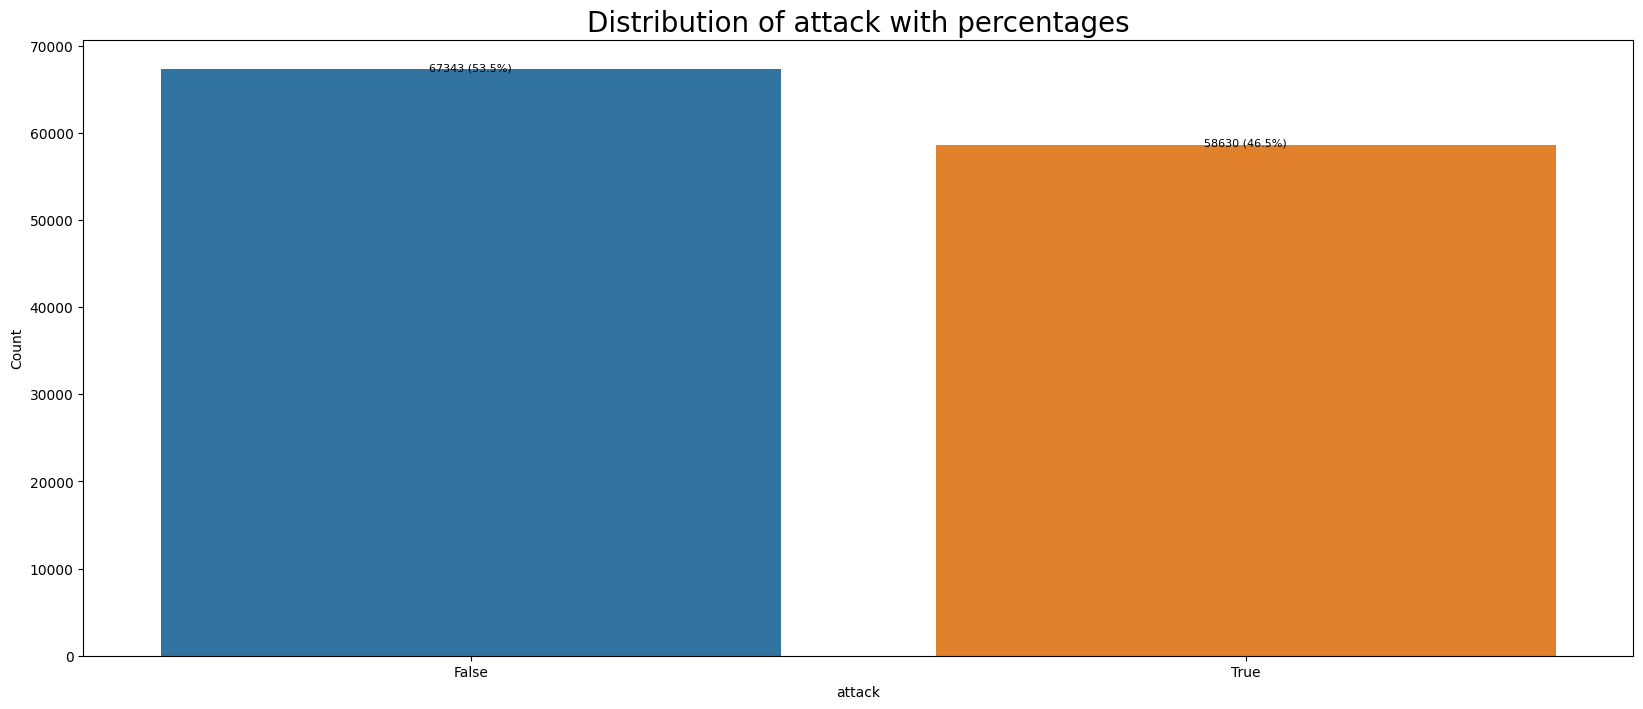

In [11]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

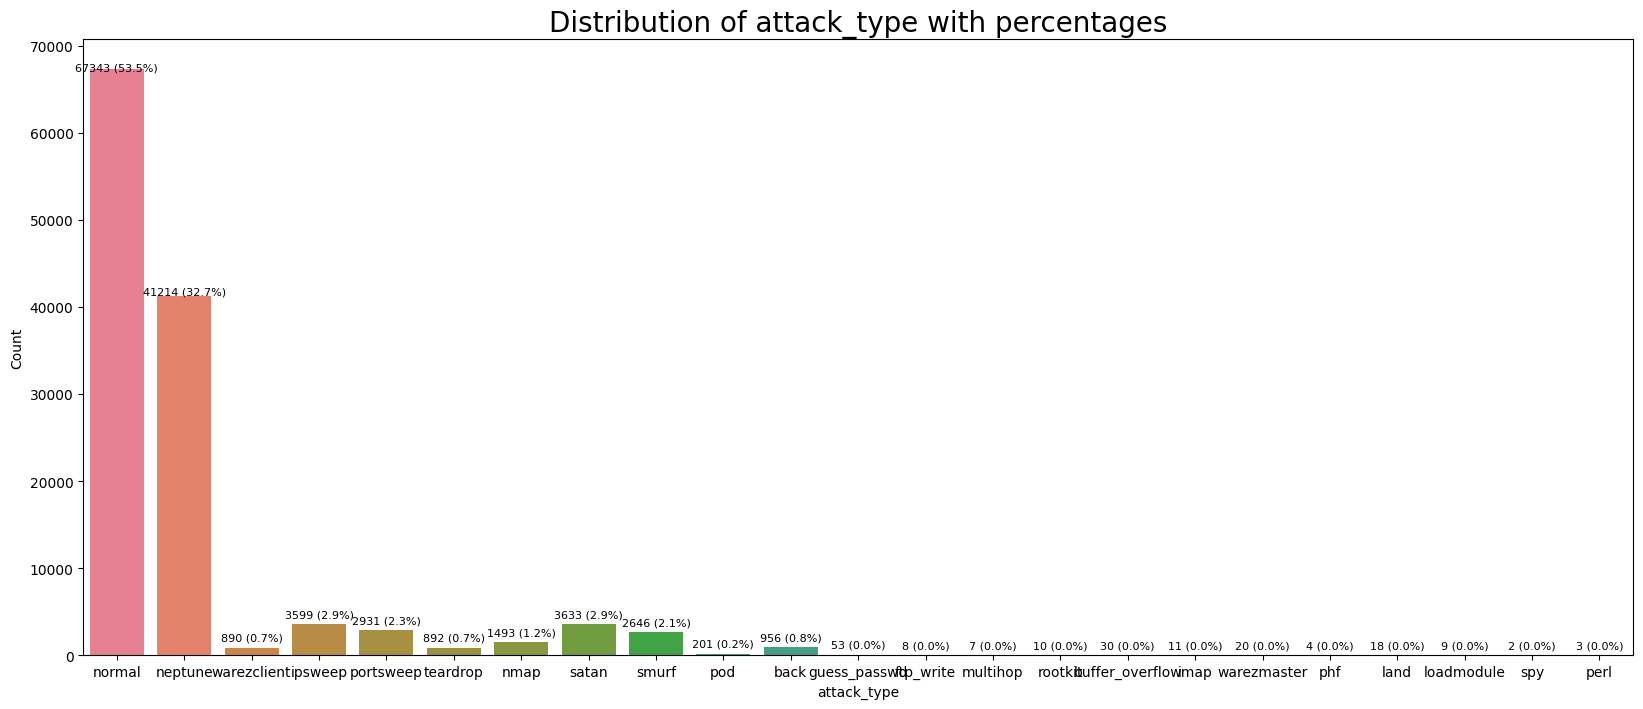

In [12]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [13]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = train_df[col2].value_counts().head(top_n).index
    filtered_df = train_df[train_df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if train_df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol Type

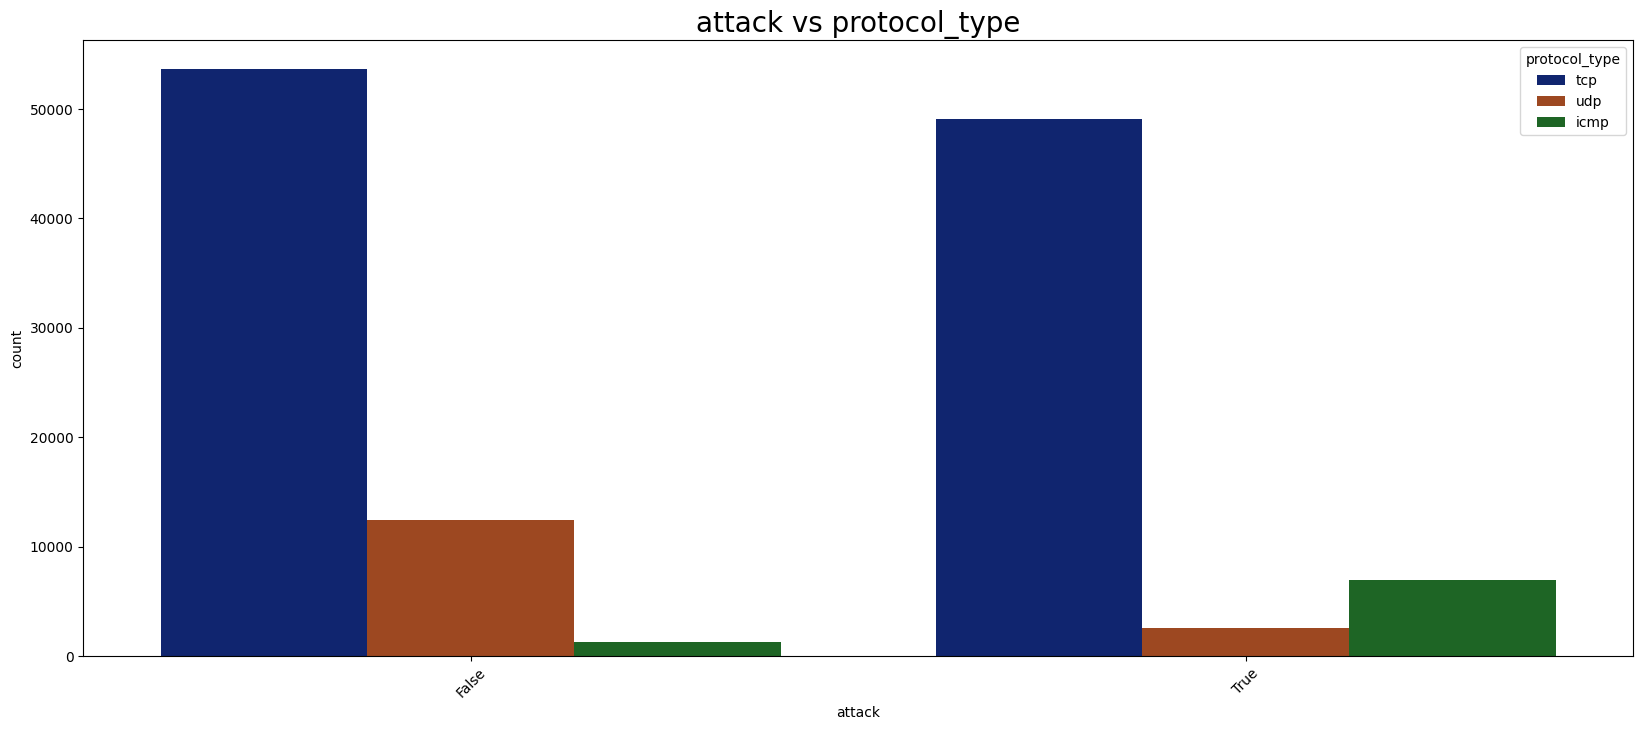

In [14]:
hist_col_vs_col('attack', 'protocol_type')

Compare Attack Type vs Protocol Type

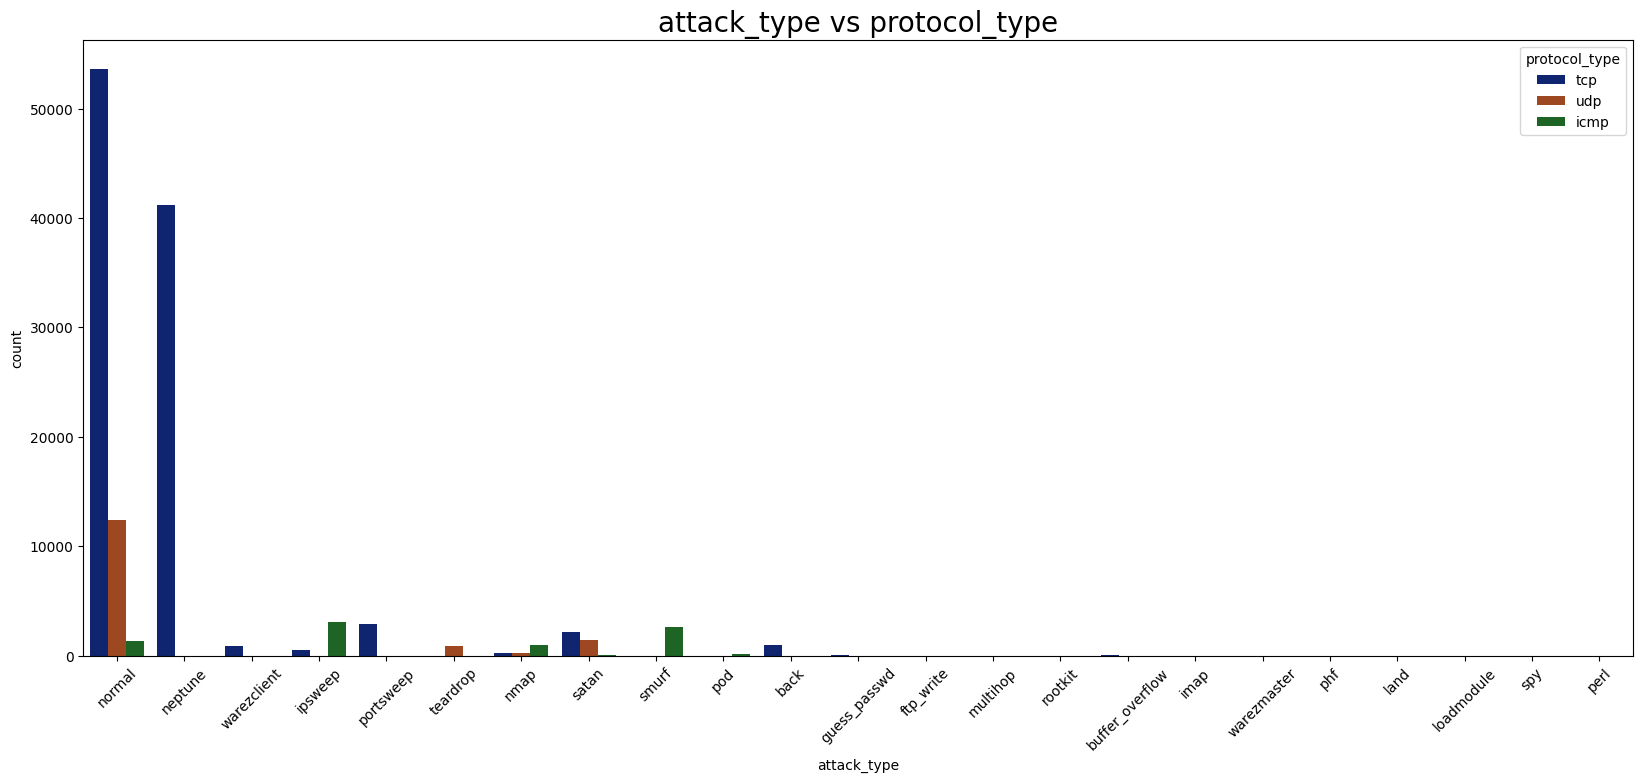

In [15]:
hist_col_vs_col('attack_type', 'protocol_type')

Compare Service vs Attack

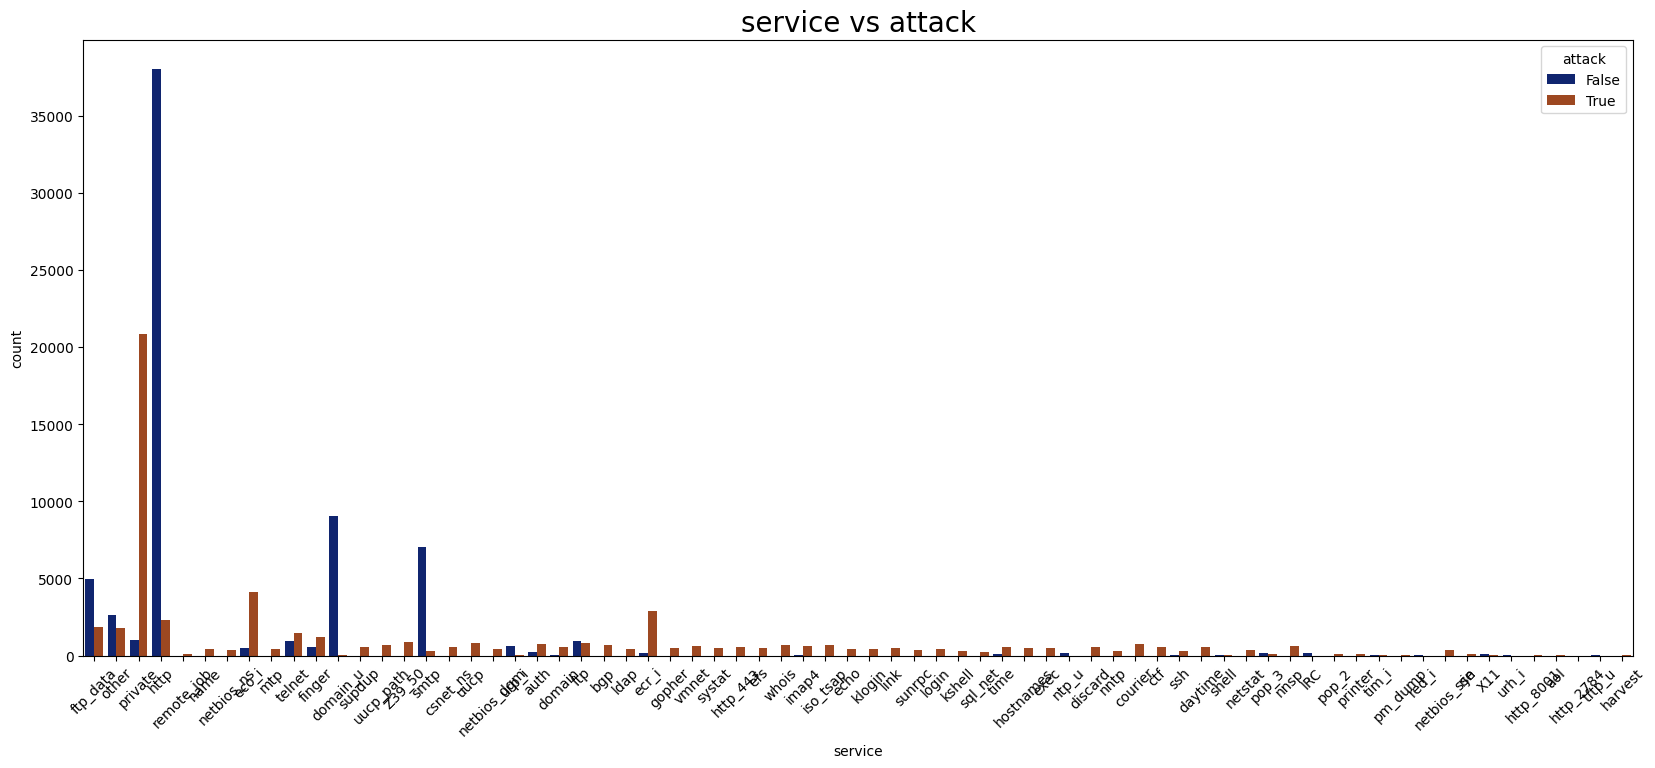

In [16]:
hist_col_vs_col('service', 'attack')

Compare logged_in vs Attack

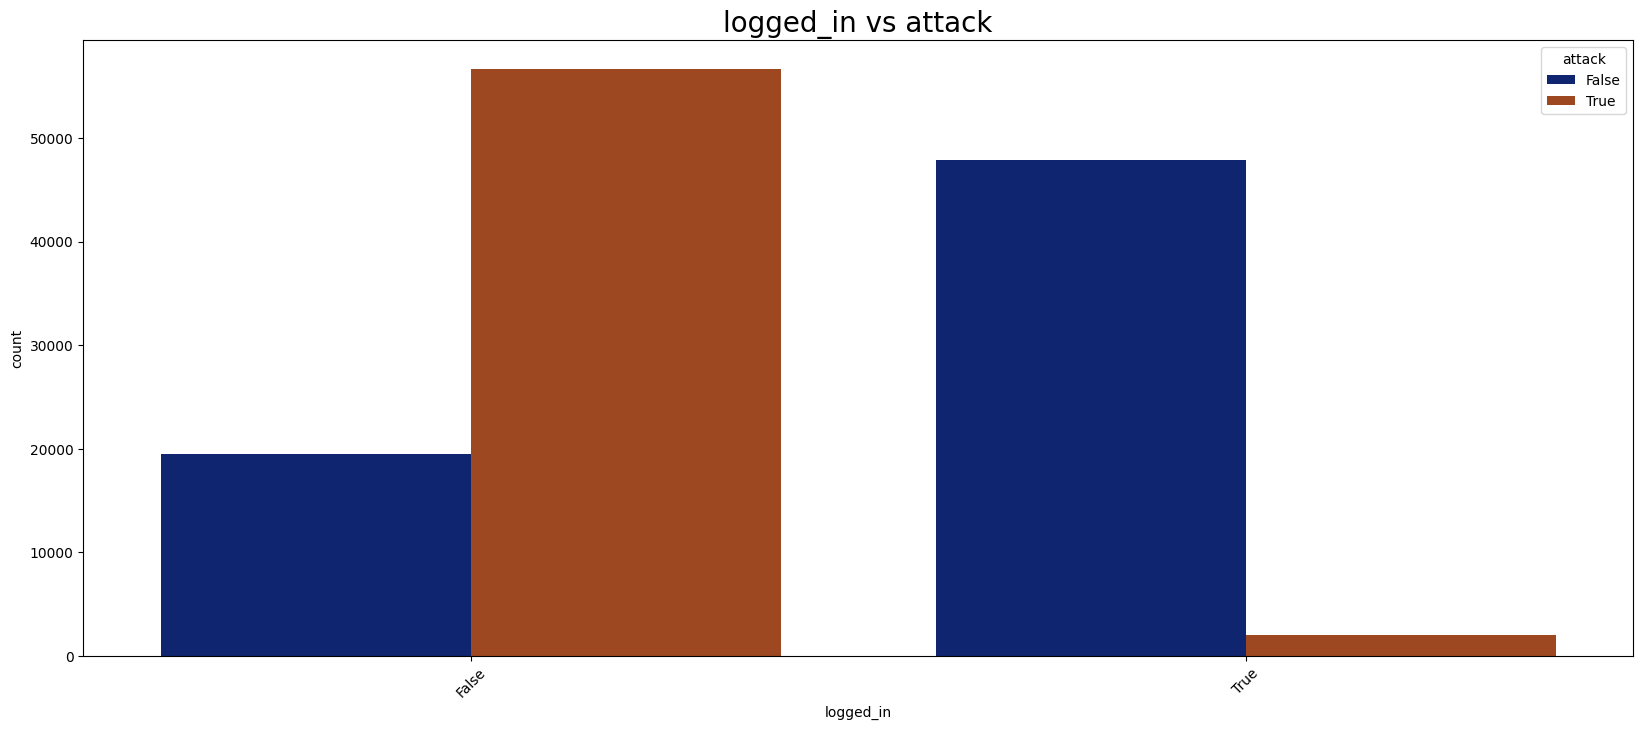

In [17]:
hist_col_vs_col('logged_in', 'attack')

Correlation matrix, useful for finding very correlated features

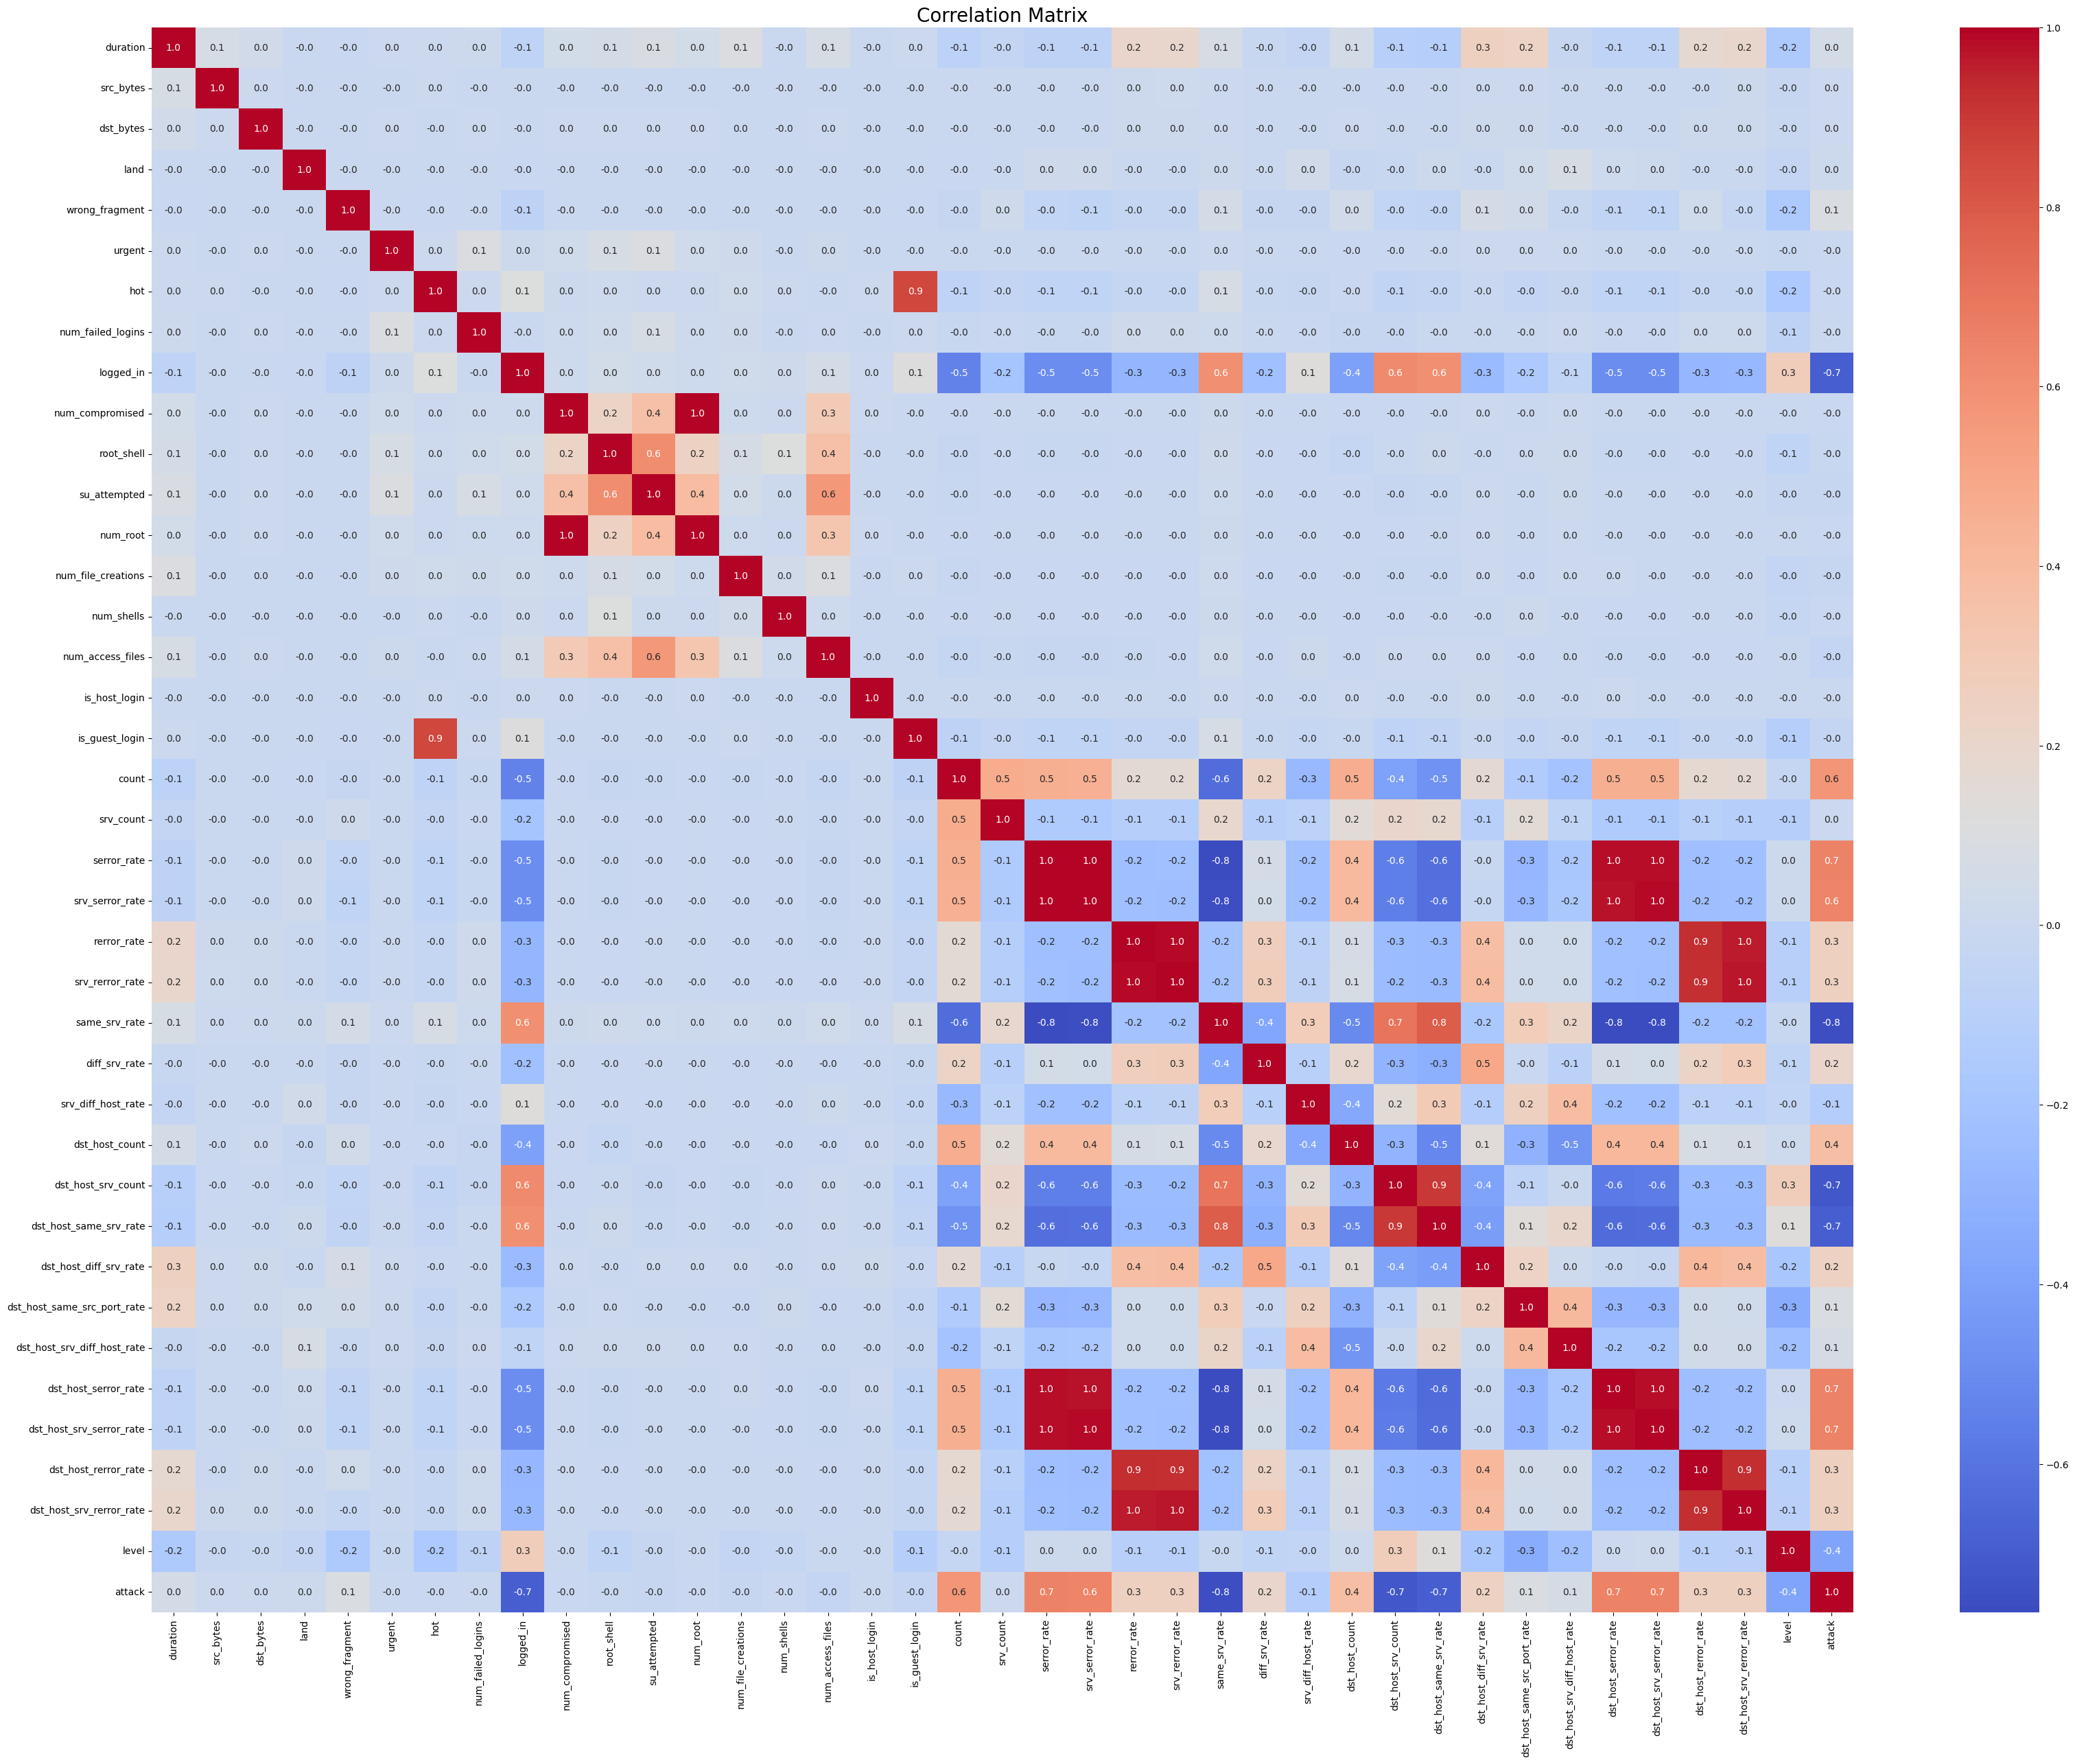

In [18]:
plt.figure(figsize=(40, 30))
correlation_matrix = train_df[train_df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [19]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(train_df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=train_df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

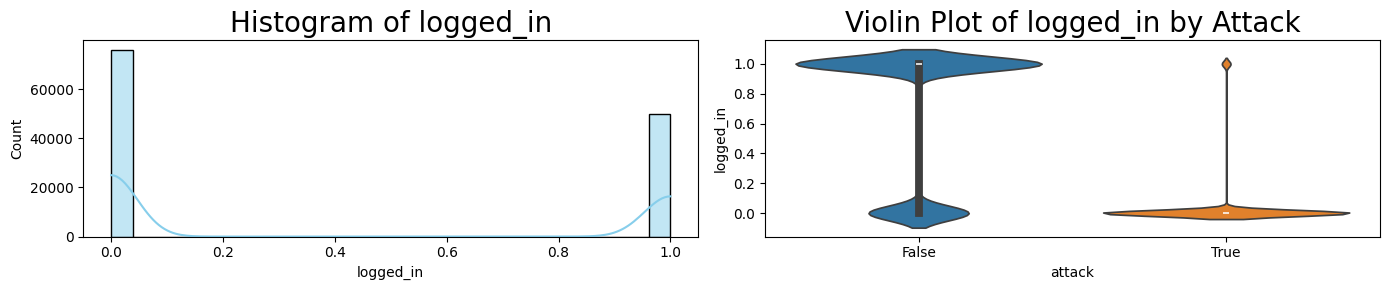

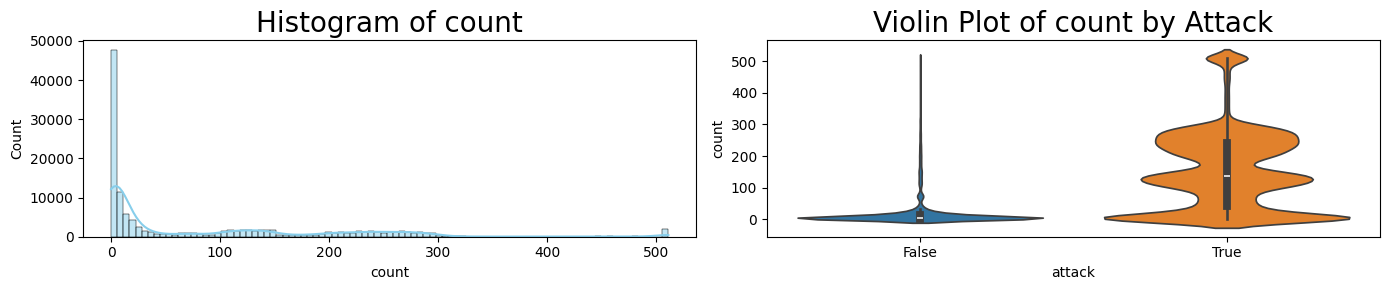

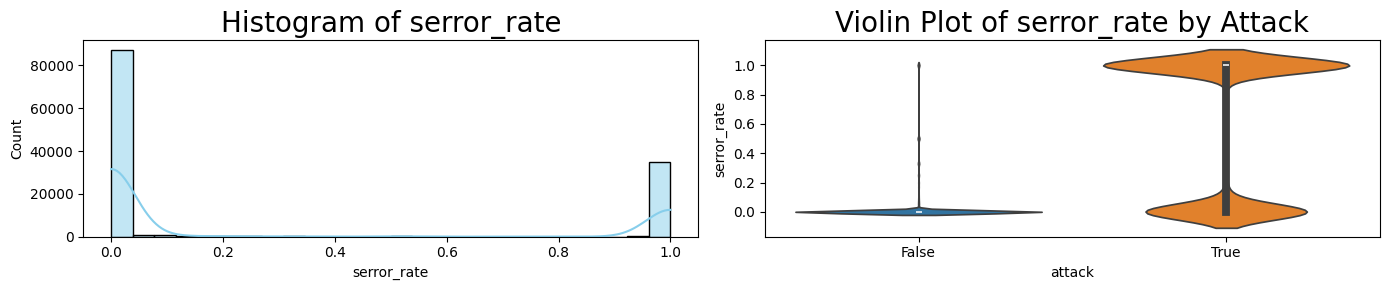

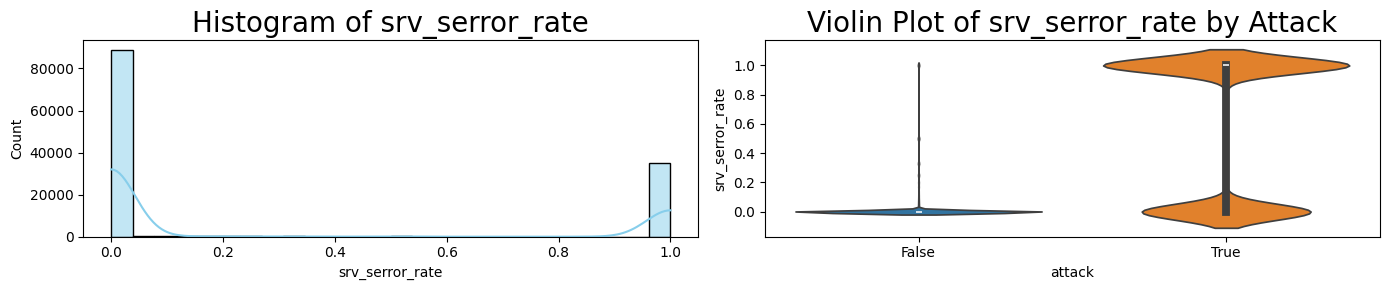

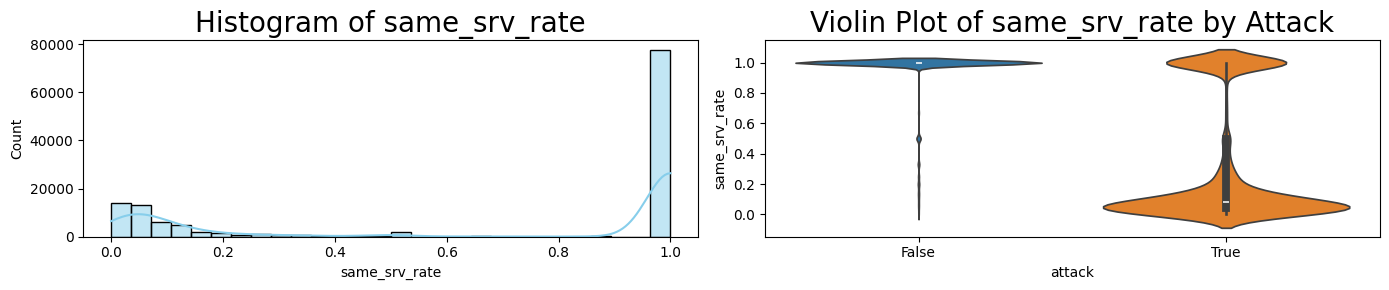

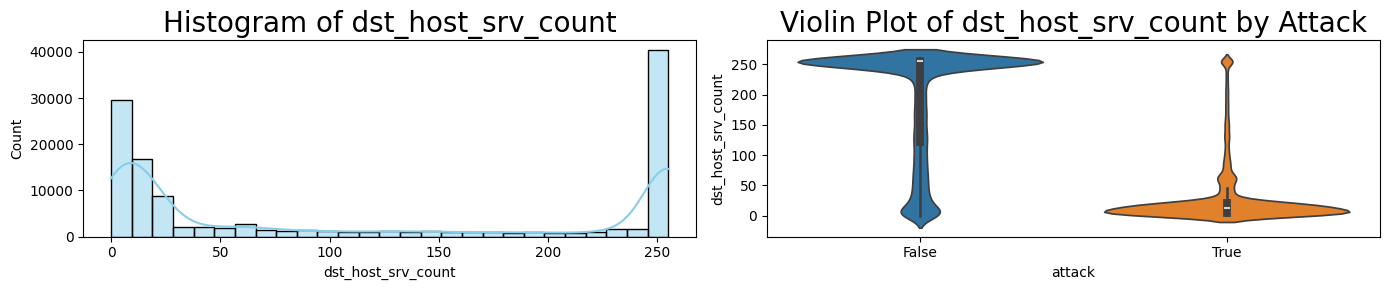

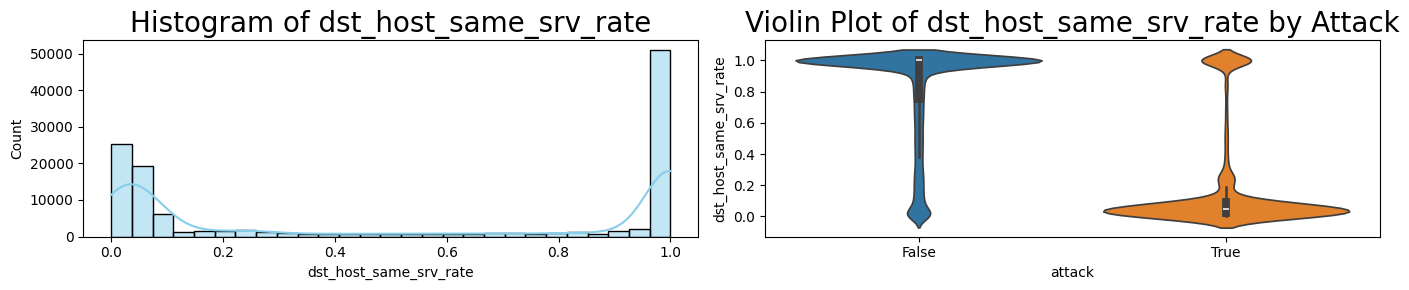

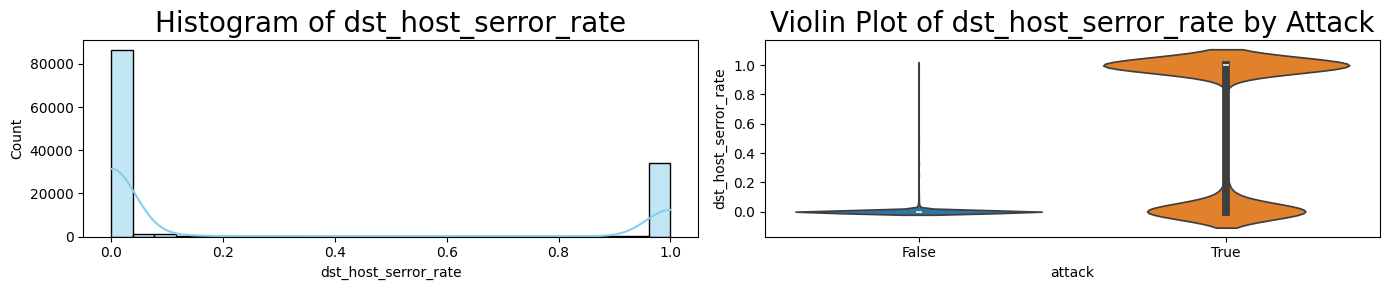

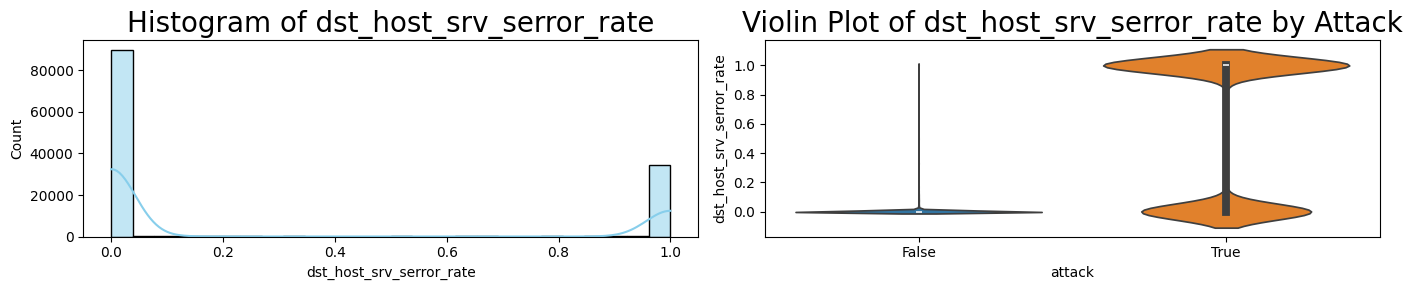

In [20]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)